In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

merged_data = pd.read_csv("C:/Users/anujb/Downloads/Fitness_Classes_Data/Fitness Classes Data/cleaned/Cleaned_Data.csv")

#convert date columns
merged_data.rename(columns={'BookingEndDateTime (Day/Month/Year)': 'BookingDate'}, inplace=True)
merged_data['BookingDate'] = pd.to_datetime(merged_data['BookingDate'], dayfirst=True)
merged_data.set_index('BookingDate', inplace=True)

In [3]:
#adding DayOfWeek and Hour columns
merged_data['DayOfWeek'] = merged_data.index.dayofweek
merged_data['Hour'] = pd.to_datetime(merged_data['BookingStartTime'], format='%I:%M %p').dt.hour

# Summarize and visualize booking data by day of the week and hour
day_of_week_bookings = merged_data.groupby('DayOfWeek')['Number Booked'].sum()
hourly_bookings = merged_data.groupby('Hour')['Number Booked'].sum()

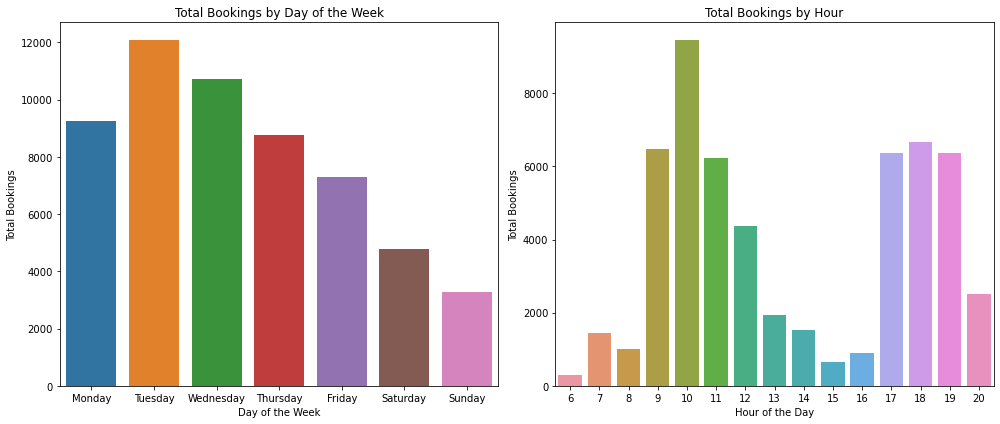

In [4]:
plt.figure(figsize=(14, 6))

#bookings by day_of_the_week
plt.subplot(1, 2, 1)
sns.barplot(x=day_of_week_bookings.index, y=day_of_week_bookings.values)
plt.title('Total Bookings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bookings')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

#bookings by hour
plt.subplot(1, 2, 2)
sns.barplot(x=hourly_bookings.index, y=hourly_bookings.values)
plt.title('Total Bookings by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Bookings')

plt.tight_layout()
plt.show()

In [5]:
#pricing adjustment rules
def adjusting_prices(row):
    price = row['Price (INR)']
    
    #location-based adjustment
    if row['ActivitySiteID'] == 'BRP':
        price *= 1.10  #increase 10% for BRP centre
        return price
    elif row['ActivitySiteID'] == 'TSC':
        price *= 0.90  #decrease 10% for TSC centre
        return price
    
    #class-based adjustment
    popular_classes = ['Body Conditioning', 'Studio Cycling', 'Pilates', 'Body Combat', 'Yoga', 'Aquafit']
    if row['Class Name'] in popular_classes:
        price *= 1.15  #increase 15% for popular classes
        return price
    elif row['Number Booked'] <= 50:
        price *= 0.85  #decrease 15% for classes for bookings lessthan and equal to 50
        return price
    
    #time-based adjustment
    if ((row['Hour'] in [9, 10, 11, 12, 17, 18, 19]) and (row['DayOfWeek'] < 5)):
        price *= 1.15  #increase 15% on weekdays
        return price
    elif row['DayOfWeek'] >= 5:
        price *= 0.85  #decrease 15% on weekends
        return price
    
    #popularity-based adjustment
    if row['Number Booked'] / row['MaxBookees'] < 0.5:
        price *= 0.85  #decrease 15% if bookings < 50% 
        return price
    elif row['Number Booked'] / row['MaxBookees'] >= 0.5:
        price *= 1.15  #increase 15% if bookings >= 50%
        return price
    
    return price

merged_data['Adjusted Price (INR)'] = merged_data.apply(adjusting_prices, axis=1)

print(merged_data[['Class Name', 'Price (INR)', 'Adjusted Price (INR)', 'Number Booked', 'MaxBookees', 'DayOfWeek', 'Hour', 'ActivitySiteID']].head())

merged_data.to_csv('C:/Users/anujb/Downloads/Fitness_Classes_Data/Fitness Classes Data/cleaned/dynamic_pricing.csv',index=False)

            Class Name  Price (INR)  Adjusted Price (INR)  Number Booked  \
BookingDate                                                                
2018-06-01    20:20:20          499                 548.9             28   
2018-06-08    20:20:20          499                 548.9             35   
2018-06-15    20:20:20          499                 548.9             31   
2018-06-22    20:20:20          499                 548.9             32   
2018-06-29    20:20:20          499                 548.9             19   

             MaxBookees  DayOfWeek  Hour ActivitySiteID  
BookingDate                                              
2018-06-01           35          4     9            BRP  
2018-06-08           35          4     9            BRP  
2018-06-15           35          4     9            BRP  
2018-06-22           35          4     9            BRP  
2018-06-29           35          4     9            BRP  
